In [ ]:
import bs4
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
link='https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&otracker=clp_metro_expandable_7_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_Q0QIS4SPJNLH_wp2&fm=neo%2Fmerchandising&iid=M_1bc8c2f0-5cdc-4fab-b6e8-e4d2a3a3b7d5_3.Q0QIS4SPJNLH&ppt=browse&ppn=browse&ssid=vir6vllmds0000001649217459744'

In [ ]:
page = requests.get(link)
page

<Response [200]>

In [ ]:
soup = bs(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6e7580.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link

In [ ]:
name1=soup.find_all('div', attrs={'class':'_4rR01T'})
name1

[<div class="_4rR01T">SAMSUNG Galaxy F12 (Celestial Black, 64 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F12 (Sky Blue, 64 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F12 (Sea Green, 64 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F22 (Denim Blue, 64 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F22 (Denim Blue, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F22 (Denim Black, 64 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F22 (Denim Black, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F12 (Celestial Black, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy M33 5G (Mystique Green, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F12 (Sky Blue, 128 GB)</div>,
 <div class

In [ ]:
# Initialization of the lists to store the extracted data
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form,
count=0                  # Intialize search row count
products=[]              #List to store name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product 
cpu = []                 #List to store CPU specifications of the product
ram = []                 #List to store RAM specifications of the product
os = []                  #List to store OS specifications of the product
hd = []                  #List to store HDD specifications of the product
display = []             #List to store Display specifications of the product

In [ ]:
specification = soup.find_all('div', attrs={'class':'fMghEO'})  
specification#CPU, RAM, OS, HDD and Display specifications

[<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 512 GB</li><li class="rgWa7D">16.55 cm (6.515 inch) HD+ Display</li><li class="rgWa7D">48MP + 5MP + 2MP + 2MP | 8MP Front Camera</li><li class="rgWa7D">6000 mAh Lithium-ion Battery</li><li class="rgWa7D">Exynos 850 Processor</li><li class="rgWa7D">1 Year Warranty Provided by the Manufacturer from Date of Purchase</li></ul></div>,
 <div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 512 GB</li><li class="rgWa7D">16.55 cm (6.515 inch) HD+ Display</li><li class="rgWa7D">48MP + 5MP + 2MP + 2MP | 8MP Front Camera</li><li class="rgWa7D">6000 mAh Lithium-ion Battery</li><li class="rgWa7D">Exynos 850 Processor</li><li class="rgWa7D">1 Year Warranty Provided by the Manufacturer from Date of Purchase</li></ul></div>,
 <div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 512 GB</li><li class="rgWa7D">16.55 cm 

In [ ]:
for containers in soup.findAll('a',class_='_1fQZEK'):
        name=containers.find('div', attrs={'class':'_4rR01T'})
        price=containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=containers.find('div', attrs={'class':'_3LWZlK'})
        specification = containers.find('div', attrs={'class':'fMghEO'})
        
        ## Splitting integrated specification into individual CPU, RAM, OS, HDD and Display specifications
        for col in specification:
            col=col.find_all_next('li', attrs={'class':'rgWa7D'})
            cput =col[0].text
            ramt = col[1].text
            ost = col[2].text
            hdt = col[3].text
            displayt = col[4].text
        
        products.append(name.text) # Add product name to list
        
        prices.append(price.text) # Add price to list
        
        #specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
        
        cpu.append(cput) # Add CPU specifications to list
        
        ram.append(ramt) # Add RAM specifications to list
        
        os.append(ost) # Add OS specifications to list
        
        hd.append(hdt) # Add HDD specifications to list
        
        display.append(displayt) # Add Display specifications to list
        
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN') # Add Rating to list
        
        count=count+1 # Increment row count

In [ ]:
print(len(products))
print(len(ratings))
print(len(prices))
print(len(cpu))
print(len(ram))
print(len(os))
print(len(hd))
print(len(display))

24
24
24
24
24
24
24
24


In [ ]:
display

['Exynos 850 Processor',
 'Exynos 850 Processor',
 'Exynos 850 Processor',
 'MediaTek Helio G80 Processor',
 'MediaTek Helio G80 Processor',
 'MediaTek Helio G80 Processor',
 'Qualcomm Snapdragon 750G Processor',
 'Qualcomm Snapdragon 750G Processor',
 'MediaTek Helio G80 Processor',
 'Qualcomm Snapdragon 750G Processor',
 'Exynos 850 Processor',
 '12 months',
 'Qualcomm Snapdragon 750G Processor',
 'Exynos 850 Processor',
 '4 GB RAM | 128 GB ROM | Expandable Upto 512 GB',
 'Exynos 850 Processor',
 '0 0 0 208MHz Processor',
 '0 0 0 208MHz Processor',
 'NA 0 Single Core 208MHz Processor',
 '1 Year Manufacturer Warranty',
 '1 Year for Mobile & 6 Months for Accessories',
 'Dimensity 720 5G Processor',
 'Qualcomm Snapdragon 720G Processor',
 '1 Year']

In [ ]:
prices

['₹9,999',
 '₹9,999',
 '₹9,999',
 '₹10,499',
 '₹12,499',
 '₹10,499',
 '₹14,999',
 '₹14,999',
 '₹12,499',
 '₹13,999',
 '₹10,999',
 '₹16,168',
 '₹13,999',
 '₹10,999',
 '₹1,999',
 '₹10,999',
 '₹1,998',
 '₹1,999',
 '₹1,999',
 '₹1,548',
 '₹1,509',
 '₹17,485',
 '₹22,680',
 '₹10,409']

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({'Product Name':products,'RAM/ROM':cpu,'Display':ram,'Camera':os,"Battery":hd,'Processor':display,'Price':prices,'Rating':ratings,})

In [ ]:
df

,Product Name,RAM/ROM,Display,Camera,Battery,Processor,Price,Rating
0,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,"₹9,999",4.3
1,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,"₹9,999",4.3
2,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,"₹9,999",4.3
3,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹10,499",4.3
4,"SAMSUNG Galaxy F22 (Denim Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹12,499",4.3
5,"SAMSUNG Galaxy F22 (Denim Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹10,499",4.3
6,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,"₹14,999",4.2
7,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,"₹14,999",4.2
8,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹12,499",4.3
9,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,"₹13,999",4.1


In [ ]:
print(df.shape)

(24, 8)


In [ ]:
df.isnull().sum() # Check for null values

Product Name    0
RAM/ROM         0
Display         0
Camera          0
Battery         0
Processor       0
Price           0
Rating          0
dtype: int64

In [ ]:
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',' : ''}, regex=True)
df.head()

,Product Name,RAM/ROM,Display,Camera,Battery,Processor,Price,Rating
0,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,9999,4.3
1,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,9999,4.3
2,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,9999,4.3
3,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,10499,4.3
4,"SAMSUNG Galaxy F22 (Denim Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,12499,4.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


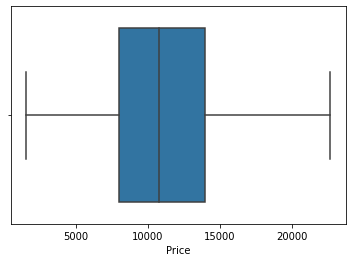

In [ ]:
import numpy as np
import seaborn as sns
df['Price'] = df['Price'].astype(np.float)
sns.boxplot(x=df['Price'])

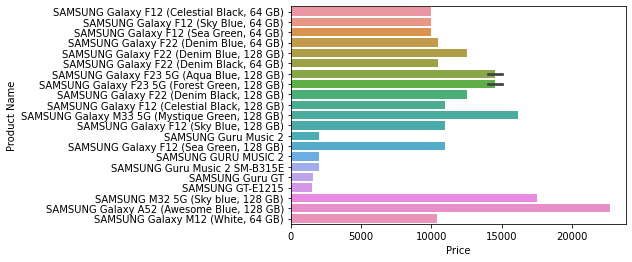

In [ ]:
sns.barplot(x=df['Price'], y=df['Product Name'])

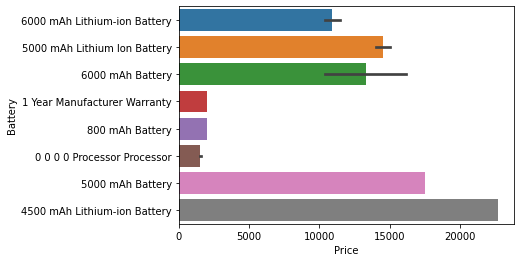

In [ ]:
sns.barplot(x=df['Price'], y=df['Battery'])

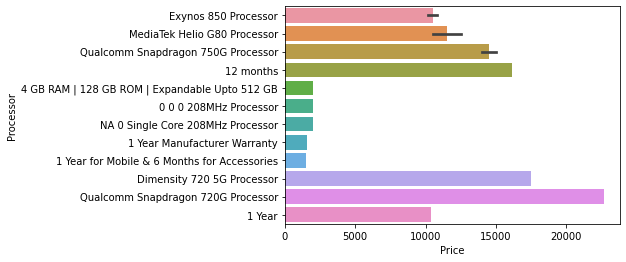

In [ ]:
sns.barplot(x=df['Price'], y=df['Processor'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


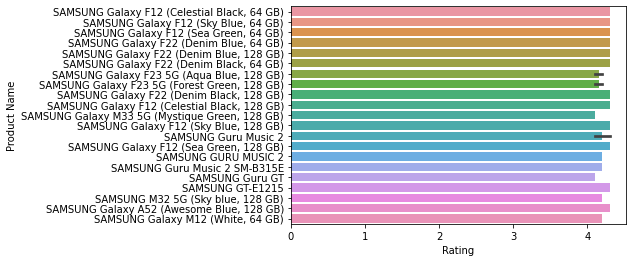

In [ ]:
df['Rating'] = df['Rating'].astype(np.float)
sns.barplot(x=df['Rating'], y=df['Product Name'])

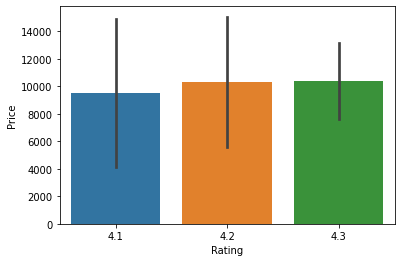

In [ ]:
sns.barplot(x=df['Rating'], y=df['Price'])

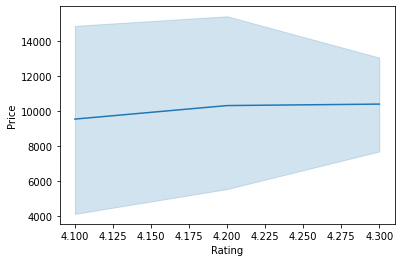

In [ ]:
sns.lineplot(x=df['Rating'], y=df['Price'])

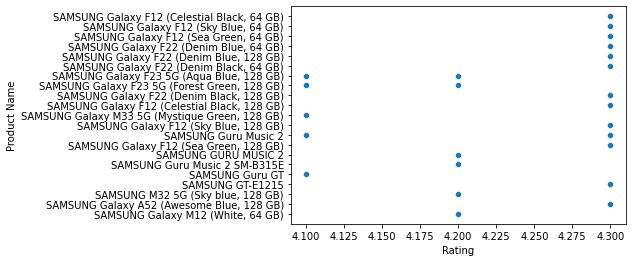

In [ ]:
sns.scatterplot(x=df['Rating'], y=df['Product Name'])

### We can conclude from here that products with lower price have a higher ratings to some extent.
# From the Above charts we can conclude that "**Samsung galaxy F22 128GB**" is best suitable to buy with medium range price, highest rating and highest features.